In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
## Load orignal data and matched data
data_white = pd.read_pickle(r"data_white.pkl")
data_black = pd.read_pickle(r"data_black.pkl")

In [7]:
print(f"White population size: {data_white.shape[0]}.")
print(f"Black population size: {data_black.shape[0]}.")

White population size: 2824322.
Black population size: 362652.


In [1]:
2824322+ 362652

3186974

In [2]:
13.4/60.1*100

22.296173044925123

In [3]:
100*362652/2824322

12.840320615000698

 **Black/White** in the population: 22.3% , [source](https://www.census.gov/quickfacts/fact/table/US/PST045219)

**Black/White** in the mortgage application: 12.8%

In [5]:
matched_data = pd.read_csv(r"matched_type.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
data_black['action_taken']= data_black['action_taken'].replace(3,0)
# action_taken=3 is denied in original dataset, we replace 3 with 0 

In [9]:
data_white['action_taken']= data_white['action_taken'].replace(3,0)

In [11]:
data_org = pd.concat([data_white,data_black])

In [12]:
matched_data['action_taken']= matched_data['action_taken'].replace(3,0)

In [13]:
data_black['action_taken'].mean()

0.7667653838942016

In [14]:
data_white['action_taken'].mean()

0.8978746049494356

In [15]:
data_org['action_taken'].mean()

0.8829554304490718

In [16]:
matched_data['action_taken'].mean()

0.8084852229430542

In [17]:
matched_data['applicant_race-1'].value_counts()

3    339885
5    339885
Name: applicant_race-1, dtype: int64

In [18]:
matched_data[matched_data['applicant_race-1']==3]['action_taken'].mean()
# applicant_race-1=3 is black

0.7821763243449991

In [19]:
matched_data[matched_data['applicant_race-1']==5]['action_taken'].mean()
# applicant_race-1=5 is white

0.8347941215411095

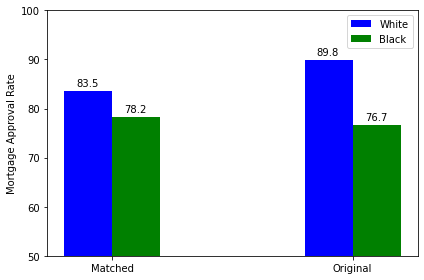

In [32]:
x = np.array([1,2])

y = np.array([83.5,89.8])
z = np.array([78.2,76.7])

plt.bar(x-0.1, y, width=0.2, color='b', align='center')
plt.bar(x+0.1, z, width=0.2, color='g', align='center')
plt.ylim([50, 100])
plt.legend(( 'White', 'Black'))
plt.xticks([1, 2], ['Matched', 'Original'] )
plt.ylabel('Mortgage Approval Rate')
plt.text(x[0]-0.15, y[0]+1, f"{y[0]:.1f}")
plt.text(x[1]-0.15, y[1]+1, f"{y[1]:.1f}")
plt.text(x[0]+0.05, z[0]+1, f"{z[0]:.1f}")
plt.text(x[1]+0.05, z[1]+1, f"{z[1]:.1f}")
plt.tight_layout()
plt.savefig('mortgage_approval_rates.pdf')

**These two numbers indicates that in similar cases, unless the race is different, the mean approval rate is by far different between races.** 

In [32]:
data_org.columns

Index(['state_code', 'conforming_loan_limit', 'action_taken', 'purchaser_type',
       'loan_type', 'lien_status', 'open-end_line_of_credit', 'loan_amount',
       'loan_to_value_ratio', 'interest_rate', 'occupancy_type', 'total_units',
       'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'co-applicant_ethnicity-1', 'applicant_race-1', 'applicant_race-2',
       'co-applicant_race-1', 'applicant_sex', 'co-applicant_sex',
       'applicant_age', 'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units'],
      dtype='object')

<AxesSubplot:>

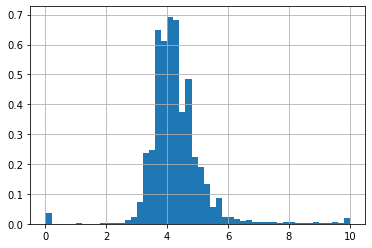

In [26]:
pd.to_numeric(data_org['interest_rate'], errors='coerce').clip(0, 10).hist(density= True,bins=50)
#Coerce= if that is not numeric change it to NaN
#bins=50 -> intrest rate in 50 buckets
#density= True -> normalize with respect to datapoints in each category

<AxesSubplot:>

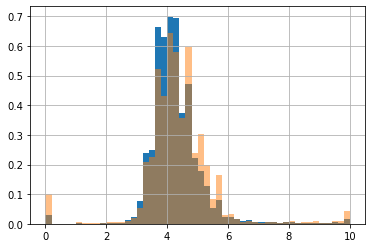

In [27]:
pd.to_numeric(data_white['interest_rate'], errors='coerce').clip(0, 10).hist(density=True,bins=50)
pd.to_numeric(data_black['interest_rate'], errors='coerce').clip(0, 10).hist(density=True, bins=50,alpha=0.5)

In [29]:
print("The mean intrest rate for White Population in original dataset is", pd.to_numeric(data_white['interest_rate'], errors='coerce').clip(0, 10).mean())
print("The mean intrest rate for Black Population in original dataset is",pd.to_numeric(data_black['interest_rate'], errors='coerce').clip(0, 10).mean())

The mean intrest rate for White Population in original dataset is 4.253866448439574
The mean intrest rate for Black Population in original dataset is 4.368998237161029


In [36]:
## Find the average loan approval for black and white applicants in both datasets

<AxesSubplot:>

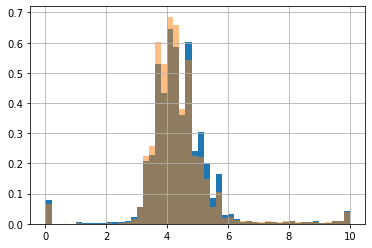

In [33]:
pd.to_numeric(matched_data[matched_data['applicant_race-1']==3]['interest_rate'], errors='coerce').clip(0, 10).hist(density=True, bins=50)
pd.to_numeric(matched_data[matched_data['applicant_race-1']==5]['interest_rate'], errors='coerce').clip(0, 10).hist(density=True, bins=50,alpha=0.5)


In [21]:
print("The mean intrest rate for Black Population in the matched data is",
      pd.to_numeric(matched_data[matched_data['applicant_race-1']==3]['interest_rate'], errors='coerce').mean())
print("The mean intrest rate for white Population in the matched data is",
      pd.to_numeric(matched_data[matched_data['applicant_race-1']==5]['interest_rate'], errors='coerce').mean())

The mean intrest rate for Black Population in the matched data is 4.492560360509767
The mean intrest rate for white Population in the matched data is 4.584308267133045


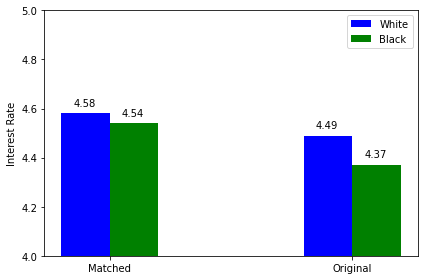

In [33]:
x = np.array([1,2])

y = np.array([4.58,4.49])
z = np.array([4.54,4.37])



plt.bar(x-0.1, y, width=0.2, color='b', align='center')
plt.bar(x+0.1, z, width=0.2, color='g', align='center')
plt.ylim([4, 5])
plt.legend(( 'White', 'Black'))
plt.xticks([1, 2], ['Matched', 'Original'] )
plt.ylabel('Interest Rate')
plt.text(x[0]-0.15, y[0]+0.03, f"{y[0]:.2f}")
plt.text(x[1]-0.15, y[1]+0.03, f"{y[1]:.2f}")
plt.text(x[0]+0.05, z[0]+0.03, f"{z[0]:.2f}")
plt.text(x[1]+0.05, z[1]+0.03, f"{z[1]:.2f}")
plt.tight_layout()
plt.savefig('Interest_rates.pdf')